# SVM binary classification

In [1]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)#10percent margin taken

def my_line (x_min, x_max, y_min, y_max, w, b):
    if w[0] == 0.0:
        if w[1] == 0.0:
            print('impossible line')
            return [0.0, 0.0], [0.0, 0.0]
        else:
            return [x_min, x_max], [- b / w[1], - b / w[1]]
    elif w[1] == 0.0:
            return [- b / w[0], - b / w[0]], [y_min, y_max]
    else:
        xn = - (w[1] * np.asarray([y_min, y_max]) + b)  / w[0]
        x_min, x_max = max(x_min, min(xn)), min(x_max, max(xn))
        return [x_min, x_max], [- (w[0] * x_min + b) / w[1], - (w[0] * x_max + b) / w[1]]

In [5]:
iris = datasets.load_iris()
x = iris.data[:100,:2]
y = iris.target[:100]

In [6]:
clf = []
for C in [1, 10, 100, 1000]:
    clf.append(svm.LinearSVC(C=C))

for C in [1, 10, 100, 1000]:
    clf.append(svm.SVC(kernel='linear', C=C))

In [7]:
for i in range(8):
    clf[i].fit(x, y)

In [8]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 8
for i in range(8):
    mesh_deci[i] = clf[i].decision_function(mesh_data).reshape(steps, steps)

# assert mesh_deci can be calculated from w and b:
# clf[i].decision_function(mesh_data)
# ==
# np.dot(mesh_data, np.transpose(clf[i].coef_)) + clf[i].intercept_

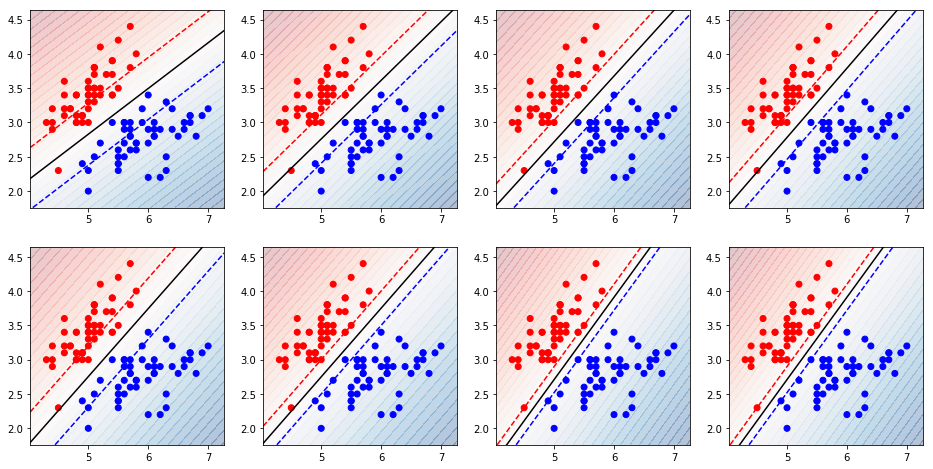

In [9]:
color = ['red', 'blue']
y_color = [color[i] for i in y]

plt.figure(figsize = (16, 8))
contour_color = [plt.cm.Reds, plt.cm.Blues]

for i in range(8):
    plt.subplot(2, 4, i+1)
    div = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0])
    pos = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0] - 1)
    neg = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[0], clf[i].intercept_[0] + 1)
    plt.plot(div[0], div[1], color='black')
    plt.plot(pos[0], pos[1], color='blue', ls='--')
    plt.plot(neg[0], neg[1], color='red', ls='--')
    plt.contourf(xx0, xx1, np.maximum(-mesh_deci[i], 0.0), 20, cmap=contour_color[0], alpha=0.3)
    plt.contourf(xx0, xx1, np.maximum(mesh_deci[i], 0.0), 20, cmap=contour_color[1], alpha=0.3)
    # plt.contourf(xx0, xx1, mesh_deci[i], 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()#as C increases the margin decreases

# SVM binary classification with kernels

In [10]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

iris = datasets.load_iris()
x = iris.data[:100,:2]
y = iris.target[:100]

In [11]:
clf = []
for kern in ['linear', 'poly', 'rbf']:
    clf.append(svm.SVC(kernel=kern, gamma='auto'))

for kern in ['linear', 'poly', 'rbf']:
    clf.append(svm.SVC(kernel=kern, gamma=1))

for i in range(6):
    clf[i].fit(x, y)

In [12]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 6
for i in range(6):
    mesh_deci[i] = clf[i].decision_function(mesh_data).reshape(steps, steps)

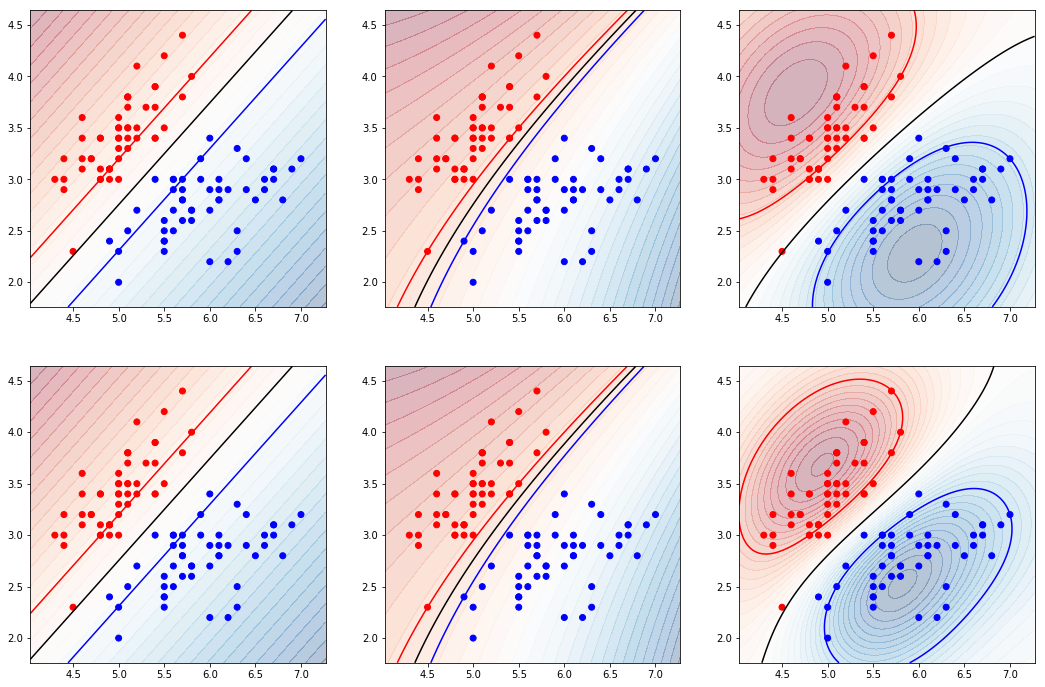

In [13]:
plt.figure(figsize = (18, 12))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.contourf(xx0, xx1, mesh_deci[i], 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.contour(xx0, xx1, mesh_deci[i], levels=[-1.0,0.0,1.0], colors=['red','black','blue'])
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM on non-linear data

In [14]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

data = np.loadtxt('C:/Users/Admin/Downloads/nonlinear.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

color = ['blue', 'red']
y_color = [color[i] for i in y]

In [15]:
clf = []
for kernel in ['poly', 'rbf']:
    for gamma in [1, 10]:
        clf.append(svm.SVC(kernel=kernel, gamma=gamma))

for i in range(4):
    clf[i].fit(x, y)

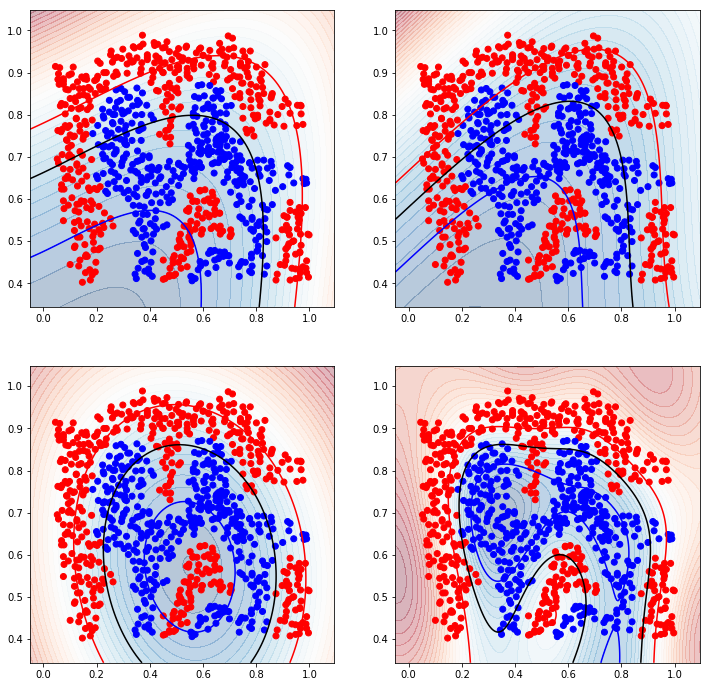

In [16]:
plt.figure(figsize = (12, 12))
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]

for i in range(4):
    plt.subplot(2, 2, i+1)
    mesh_deci = clf[i].decision_function(mesh_data).reshape(steps, steps)
    plt.contourf(xx0, xx1, -mesh_deci, 40, cmap=plt.cm.RdBu, alpha=0.3)
    plt.contour(xx0, xx1, mesh_deci, levels=[-1.0,0.0,1.0], colors=['blue','black','red'])
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM multiclass classification

In [17]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

def my_line (x_min, x_max, y_min, y_max, w, b):
    if w[0] == 0.0:
        if w[1] == 0.0:
            print('impossible line')
            return [0.0, 0.0], [0.0, 0.0]
        else:
            return [x_min, x_max], [- b / w[1], - b / w[1]]
    elif w[1] == 0.0:
            return [- b / w[0], - b / w[0]], [y_min, y_max]
    else:
        xn = - (w[1] * np.asarray([y_min, y_max]) + b)  / w[0]
        x_min = max(x_min, min(xn))
        x_max = min(x_max, max(xn))
        return [x_min, x_max], [- (w[0] * x_min + b) / w[1], - (w[0] * x_max + b) / w[1]]

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

In [18]:
clf = [svm.LinearSVC(multi_class='ovr'), svm.LinearSVC(multi_class='crammer_singer')]
for i in range(2):
    clf[i].fit(x, y)

steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = []
for i in range(2):
    mesh_deci.append(clf[i].decision_function(mesh_data))

# assert mesh_deci manually for i = [0,1,2]
# clf[i].decision_function(mesh_data)
# ==
# np.dot(mesh_data, np.transpose(clf[i])) + clf[i].intercept_

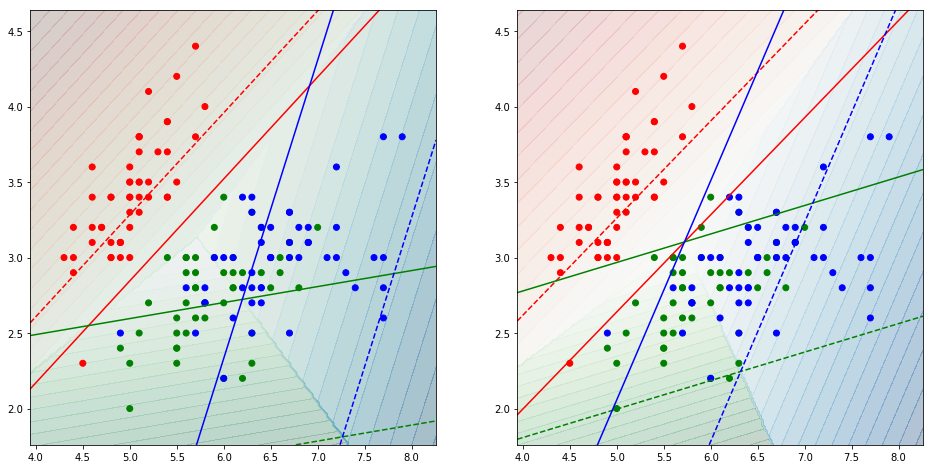

In [19]:
color = ['red', 'green', 'blue']
y_color = [color[i] for i in y]

plt.figure(figsize = (16, 8))
contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

for i in range(2):
    plt.subplot(1, 2, i+1)
    for j in range(3):
        div = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[j], clf[i].intercept_[j])
        one = my_line(x0[0], x0[-1], x1[0], x1[-1], clf[i].coef_[j], clf[i].intercept_[j] - 1)
        plt.plot(div[0], div[1], color=color[j])
        plt.plot(one[0], one[1], color=color[j], ls='--')
        plt.contourf(xx0, xx1, np.array([max(k) if np.argmax(k) == j else 0 for k in mesh_deci[i]]).reshape(steps, steps), 20, cmap=contour_color[j], alpha=0.3)
    
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()

# SVM multiclass classification with kernels

In [20]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

def my_mask (value, selected):
    min_value = 1.7e+308
    for i in range(len(value)):
        if selected[i] and value[i] < min_value:
            min_value = value[i]
    for i in range(len(value)):
        if not selected[i]:
            value[i] = min_value
    return value

iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
x = np.append(x, iris.data[:50,:2] + [1.0, 1.0], 0)
y = np.append(y, [3] * 50, 0)

In [21]:
clf = [svm.SVC(kernel='linear', probability=True, decision_function_shape = 'ovo'),
       svm.SVC(kernel='poly', probability=True, decision_function_shape = 'ovo'),
       svm.SVC(probability=True, decision_function_shape = 'ovo')]
for i in range(3):
    clf[i].fit(x, y)

In [22]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = [0] * 3
mesh_prob = [0] * 3
n_class = 4
n_ovo = n_class * (n_class - 1) // 2

color = ['red', 'green', 'blue', 'yellow']
y_color = [color[i] for i in y]

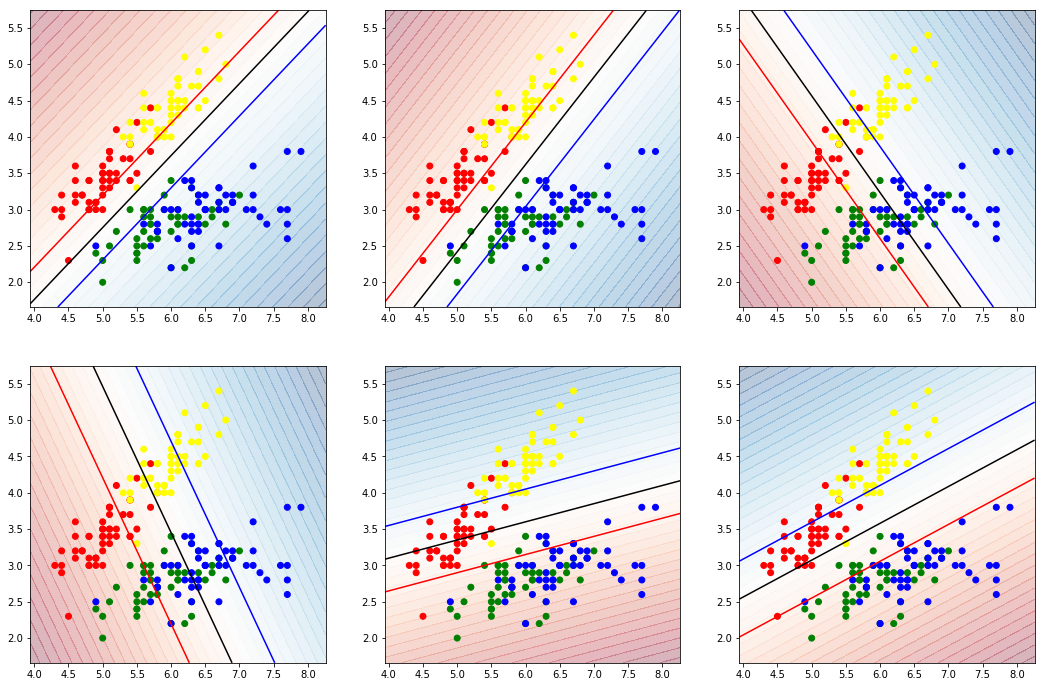

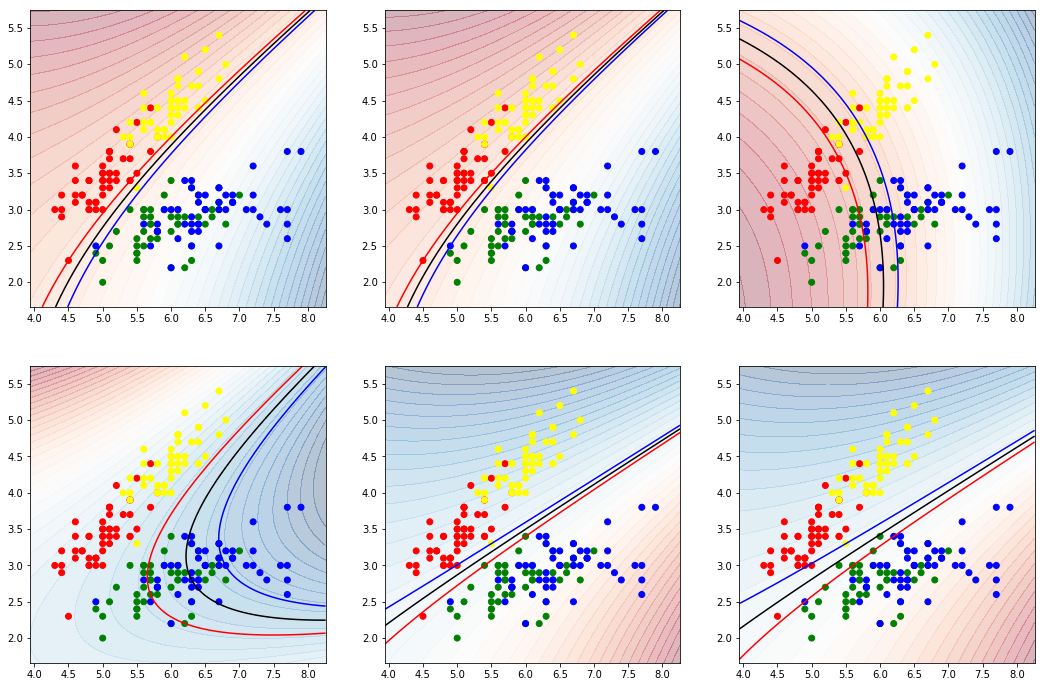

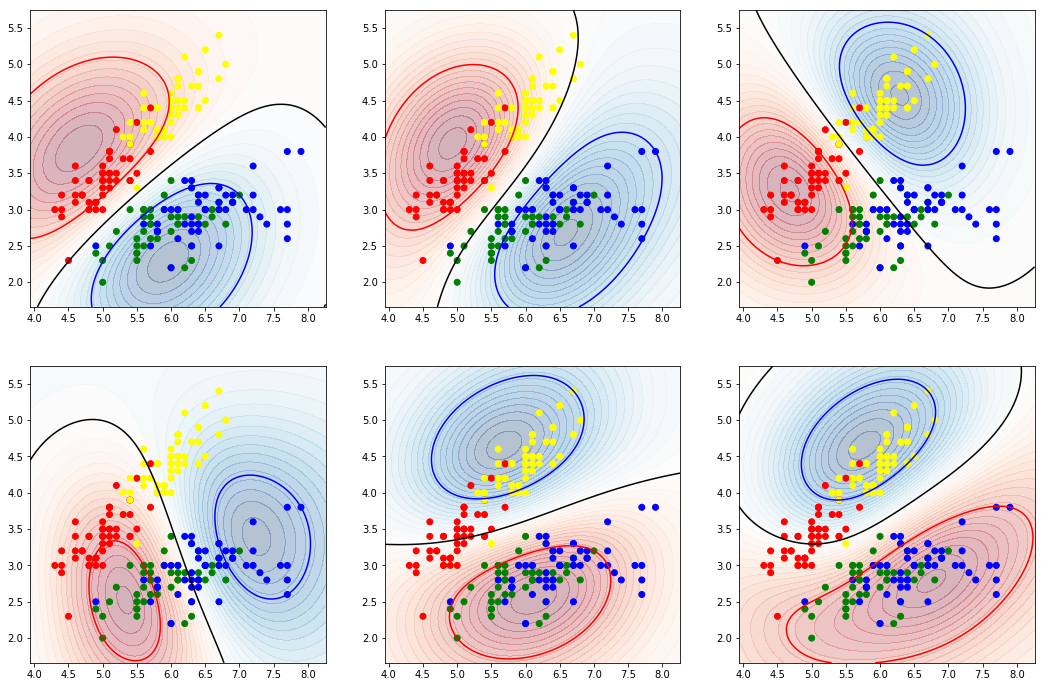

In [23]:
for i in range(3):
    plt.figure(figsize = (18, 12))
    pred = clf[i].predict(mesh_data)
    deci = clf[i].decision_function(mesh_data)
    prob = clf[i].predict_proba(mesh_data)
    mesh_deci[i] = np.zeros((steps * steps, n_class))
    j = 0
    for k in range(n_class):
        for l in range(k+1, n_class):
            mesh_deci[i][:,k] += deci[:,j]
            mesh_deci[i][:,l] -= deci[:,j]
            plt.subplot(2, 3, j + 1)
            plt.contourf(xx0, xx1, -deci[:,j].reshape(steps, steps), 40, cmap=plt.cm.RdBu, alpha=0.3)
            plt.contour(xx0, xx1, deci[:,j].reshape(steps, steps), levels=[-1.0,0.0,1.0], colors=['blue','black','red'])
            plt.scatter(x[:,0], x[:,1], c=y_color)
            j += 1
    plt.show()
    for j in range(n_class):
        prob[:,j] = my_mask(prob[:,j], pred == j)
        mesh_deci[i][:,j] = my_mask(mesh_deci[i][:,j], pred == j)
    mesh_deci[i] = mesh_deci[i].reshape(steps, steps, n_class)
    mesh_prob[i] = prob.reshape(steps, steps, n_class)

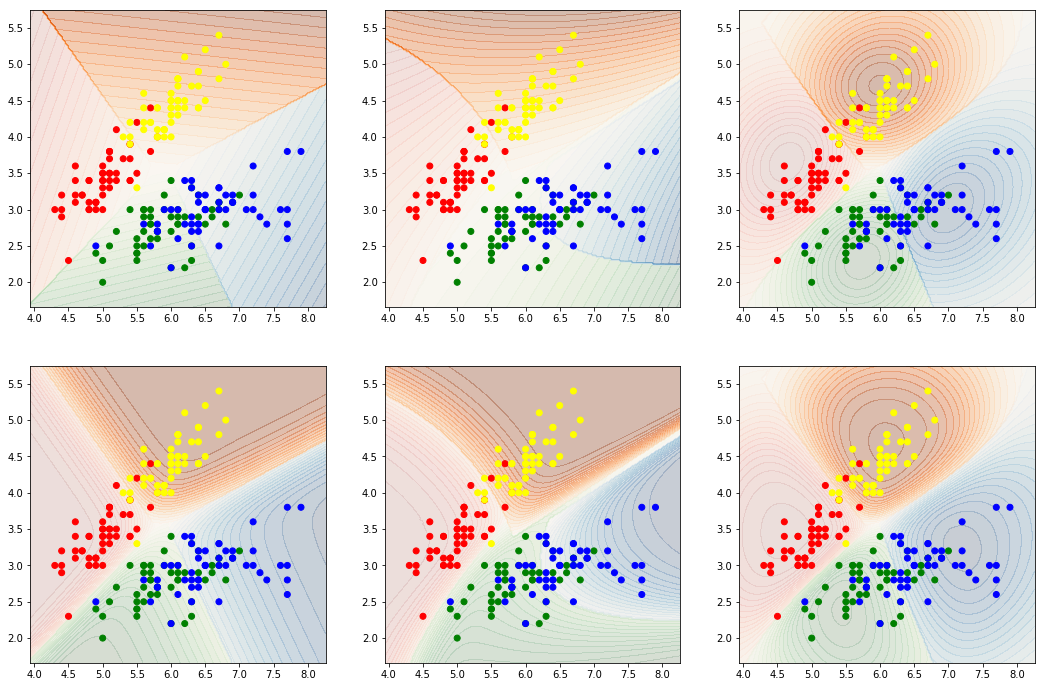

In [24]:
plt.figure(figsize = (18, 12))
contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]

for i in range(3):
    plt.subplot(2, 3, i+1)
    for j in range(n_class):
        plt.contourf(xx0, xx1, mesh_deci[i][:,:,j], 20, cmap=contour_color[j], alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)
    plt.subplot(2, 3, i+4)
    for j in range(n_class):
        plt.contourf(xx0, xx1, mesh_prob[i][:,:,j], 20, cmap=contour_color[j], alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y_color)

plt.show()